In [1]:

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import cPickle as pickle

In [3]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


In [27]:
def VI(gt, seg):
  # total_vi = 0
  slice_vi = []    
  for i in range(10):
      current_vi = gp.Util.vi(gt[i].astype(np.int64), seg[i].astype(np.int64))
      # total_vi += current_vi
      slice_vi.append(current_vi)
  # total_vi /= 10
  return np.mean(slice_vi), np.median(slice_vi), slice_vi


In [49]:
init_mean_vi = VI(gold, rhoana)[0]
init_median_vi = VI(gold, rhoana)[1]
init_vi_per_slice = VI(gold, rhoana)[2]

In [100]:
FP_USERS = ['/home/d/GPSTUDY/S9', '/home/d/GPSTUDY/S21']
GP_USERS = ['/home/d/GPSTUDY/DanielGP', '/home/d/GPSTUDY/S25', '/home/d/GPSTUDY/S28']

In [5]:
newrhoana = 'ui_results.p'
times = 'times.p'
corrections = 'corrections.p'
correction_vis = 'correction_vis.p'

In [6]:
fp_outputs = []
fp_times = []
fp_corrections = []
fp_vis =[]

for i,f in enumerate(FP_USERS):
    with open(FP_USERS[i]+'/'+newrhoana, 'rb') as f:
        fp_newrhoana = pickle.load(f)
        fp_outputs.append(fp_newrhoana)
    with open(FP_USERS[i]+'/'+times, 'rb') as f:
        fp_time = pickle.load(f)
        fp_time = [int(v) for v in fp_time]
        fp_times.append(fp_time)
    with open(FP_USERS[i]+'/'+corrections, 'rb') as f:
        fp_correction = pickle.load(f)       
        fp_corrections.append(fp_correction)
    with open(FP_USERS[i]+'/'+correction_vis, 'rb') as f:
        fp_correction_vis = pickle.load(f) 
        fp_vis.append(fp_correction_vis)

In [7]:
fp_times_mean = []
for t in fp_times:
    fp_times_mean.append(np.mean(t))
print 'Avg. time',np.mean(fp_times_mean)

Avg. time 7470.83990101


In [23]:
fp_corrections_mean = []
fp_accepted_corrections = []

for c in fp_corrections:
    fp_corrections_mean.append(len(c))
    a_counter = 0
    for d in c:
        if d[1] == '1':
            # user accepted
            a_counter +=1
    fp_accepted_corrections.append(a_counter)
    
print 'Avg. corrections',np.mean(fp_corrections_mean)
print 'Avg. accepted', np.mean(fp_accepted_corrections)

Avg. corrections 248.0
Avg. accepted 24.5


In [44]:
fp_vi_per_c_per_user = []
for v in fp_vis:
    vis = [init_median_vi]
    for c in v:
        vi_per_c = np.median(c)
        vis.append(vi_per_c)
    fp_vi_per_c_per_user.append(vis)

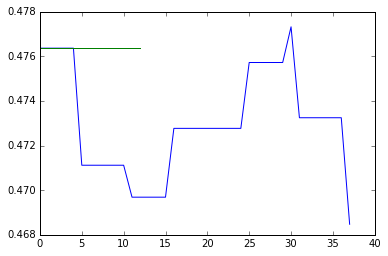

In [45]:
for u in fp_vi_per_c_per_user:
    plt.plot(u)

In [74]:
fp_vi_per_slice_per_user = []
fp_vi_per_slice = [0,0,0,0,0,0,0,0,0,0]
for o in fp_outputs:
    fp_vi_per_slice_per_user.append(VI(gold, o)[2])
for u in fp_vi_per_slice_per_user:
    for z,v in enumerate(u):
        fp_vi_per_slice[z] += v
for z in range(10):
    fp_vi_per_slice[z] /= len(fp_outputs)

In [101]:
gp_outputs = []
gp_times = []
gp_corrections = []
gp_vis =[]

for i,f in enumerate(GP_USERS):
    with open(GP_USERS[i]+'/'+newrhoana, 'rb') as f:
        gp_newrhoana = pickle.load(f)
        gp_outputs.append(gp_newrhoana)
    with open(GP_USERS[i]+'/'+times, 'rb') as f:
        gp_time = pickle.load(f)
        gp_time = [int(v) for v in gp_time]
        gp_times.append(gp_time)
    with open(GP_USERS[i]+'/'+corrections, 'rb') as f:
        gp_correction = pickle.load(f)       
        gp_corrections.append(gp_correction)
    with open(GP_USERS[i]+'/'+correction_vis, 'rb') as f:
        gp_correction_vis = pickle.load(f) 
        gp_vis.append(gp_correction_vis)

In [102]:
gp_times_mean = []
for t in gp_times:
    gp_times_mean.append(np.mean(t))
print 'Avg. time',np.mean(gp_times_mean)

Avg. time 3330.2755659


In [103]:
gp_corrections_mean = []
gp_accepted_corrections = []
for c in gp_corrections:
    gp_corrections_mean.append(len(c))
    a_counter = 0
    for d in c:
        if d[1] == '1':
            # user accepted suggested correction
            a_counter += 1
            
    gp_accepted_corrections.append(a_counter)
print 'Avg. corrections',np.mean(gp_corrections_mean)
print 'Avg. accepted', np.mean(gp_accepted_corrections)

Avg. corrections 523.666666667
Avg. accepted 125.666666667


In [104]:
vi_per_c_per_user = []
for v in gp_vis:
    vis = [init_median_vi]
    for c in v:
        vi_per_c = np.median(c)
        vis.append(vi_per_c)
    vi_per_c_per_user.append(vis)

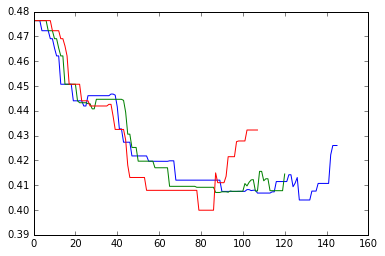

In [105]:
for u in vi_per_c_per_user:
    plt.plot(u)

In [97]:
gp_vi_per_slice_per_user = []
gp_vi_per_slice = [0,0,0,0,0,0,0,0,0,0]
for o in gp_outputs:
    gp_vi_per_slice_per_user.append(VI(gold, o)[2])
for u in gp_vi_per_slice_per_user:
    for z,v in enumerate(u):
        gp_vi_per_slice[z] += v
for z in range(10):
    gp_vi_per_slice[z] /= len(gp_outputs)        

In [98]:
gp_vi_per_slice

[0.36967514172429716,
 0.38730775820925034,
 0.37591754825961887,
 0.3801188437942904,
 0.4331156911497711,
 0.4181220025254824,
 0.47794070580670933,
 0.44247722827842484,
 0.4700637988413354,
 0.44459765732436685]

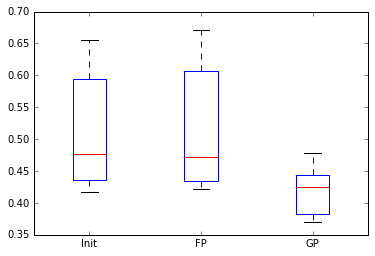

In [99]:
plt.subplots()
objects = ['Init', 'FP', 'GP']
data = [init_vi_per_slice, fp_vi_per_slice, gp_vi_per_slice]
y_pos = range(1,len(objects)+1)

bp = plt.boxplot(data)
plt.xticks(y_pos, objects)
plt.show()

In [90]:
fp_vi_per_slice

[0.43415215394900386,
 0.42966357829289636,
 0.42254568993821184,
 0.4343284933677536,
 0.48595112227052084,
 0.4588830170111309,
 0.6163399783400201,
 0.6238865923884336,
 0.6704998080027598,
 0.5806550077586121]